<a href="https://colab.research.google.com/github/molecular-mar/molecular-mar.github.io/blob/master/Sesion_8_1_PAQ24P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métodos numéricos
---



Existen dos métodos para la resolución de un problema matemático:

* El *método analítico* proviene del análisis de las expresiones matemáticas para establecer una solución precisa del problema en cuestión. Por ejemplo, cuando despejamos una variable o calculamos una integral indefinida encontramos una expresión analítica, en la cuál solo necesitamos introducir valores para obtener un resultado.

Un primer ejemplo podría ser resolver una ecuación cuadrática, por ejemplo $x^2 -5  = x +3 $. La solución analítica la encontramos al despejar x, o en este caso podemos utilizar la ecuación general de segundo orden:

$$x = \frac{-b\pm \sqrt{b^2-4ac}}{2a} $$

Si damos valores $a,b,c$ podemos obtener un valor de x.

Otro ejemplo. Sabemos que la ecuación de Schrödinger tiene una solución analítica para el átomo de hidrógeno:

\begin{equation}
\psi_{nlm}(r,\theta,\phi) = R_{nl}(r) Y_{lm}(\theta,\phi),
\end{equation}

donde $R_{nl}(r)$ es la parte radial y $Y_{lm}(\theta,\phi)$ la parte angula de la función de onda $\psi_{nlm}(r,\theta,\phi)$.

La parte radial está dada por:

\begin{equation}
R_{nl}(r) = \sqrt{\left(\frac{2}{n a_0}\right)^3 \frac{(n - l - 1)!}{2n[(n + l)!]^3}} e^{-\frac{r}{na_0}} \left(\frac{2r}{na_0}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{na_0}\right),
\end{equation}

donde $n$ es el número cuántico principal, $l$ el número cuántico azimutal, $a_0$ el radio de Bohr, y $L_{n-l-1}^{2l+1}(x)$ son los poliómios asociados de Legendre.

La parte angular $Y_{lm}(\theta,\phi)$ está dada por los armónicos esféricos:

\begin{equation}
Y_{lm}(\theta,\phi) = (-1)^m \sqrt{\frac{(2l + 1)(l - m)!}{4\pi(l + m)!}} P_l^m(\cos\theta) e^{im\phi},
\end{equation}

donde $P_l^m(x)$ son los polinómios asociados de Legendre.

Como podrás notar, una solución analítica no es necesariamente sencilla ni fácil de evaluar. Sin embargo, cuando fijamos las variables y condiciones podemos obtener un resultado preciso y claro. Además, con un análisis de las ecuaciones mostradas podemos dar una descripción general de las soluciones: el comportamiendo para $r$ corto o largo, o los cambios de forma dados por los números cuánticos fijados.


* Por otro lado, un *método numérico* no hace uso de una expresión final, sino que involucra el uso de un procedimiento con el cuál podemos acercarnos a un resultado en concreto. Se les conoce como numéricos ya que encontraremos solamente un resultado dado por un número, no una expresión.

Por ejemplo, podemos usar un método de integración numérica para calcular el área bajo la curva de un voltamperograma:



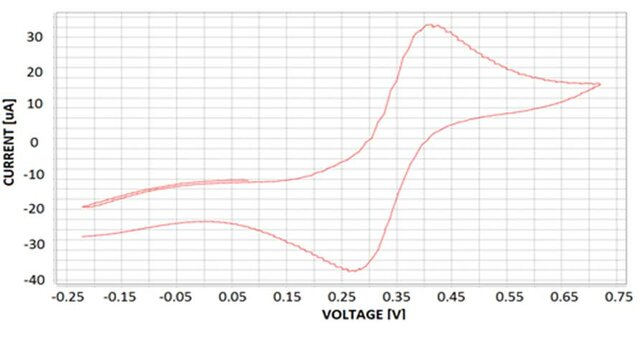

Los datos mostrados arriba son experimentales, lo que representa una primera dificultad para poder calcular la integral, ya que no tenemos una función que represente a esta curva. Un método numérico puede darnos el valor de la integral.

---
En general, las soluciones analíticas suelen ser preferidas, ya que nos brinda de una expresión que describe el problema matemático que estamos tratando y no solamente un valor, además de que dichas soluciones pueden considerarse exactas.

Sin embargo, existen distintas razones para el uso de un método numérico:

* El problema matemático no tiene una solución analítica (por ejemplo, algunas integrales indefinidas cuya solución se desconoce, o si contamos con los pares de datos de una función pero desconocemos su forma analítica).
* Se prefiere en algún caso optar por un método numérico general que la busqueda de soluciones analíticas, ya que puede ser más sencillo.
* La solución analítica es complicada y requiere de una cantidad considerable de cálculos comparado con una solución numérica.

Los métodos numéricos no suelen ser empleados de forma manual en una libreta, dado que sería necesario el registro detallado y manual de los pasos intermedios y repetitivos que suelen involucrar. Con la llegada del cómputo estos métodos han tomado una mayor relevancia, ya que estos pueden ser programados y aprovechar los recursos de la computadora. Actualmente estos métodos permiten obtener resultados cuya precisión compite con la solución exacta.

Existen métodos numéricos para atacar problemas de tipos diversos. Entre ellos tenemos:

* Integración numérica (suma de rectángulos, de trapecios, regla de Simpson)
* Resolución de ecuaciones no lineales (bisección, secante, método de Newton)
* Sistemas de ecuaciones lineales (eliminación gaussiana)
* Interpolación lineal
* Ecuaciones diferenciales de primer orden (Euler, Euler mejorado, Runge-Kutta de cuarto orden)

El siguiente recurso puede darte más detalle sobre la mayoría de estos métodos (mostrados en lenguaje C, pero adaptables a Python con lo visto en el curso):

* Cedillo, A., Manual de prácticas para el curso Química Computacional, (http://www.fqt.izt.uam.mx/Profes/ACO/qcomp_n.pdf), 2004.

En esta sesión, exploraremos que con el conocimiento adquirido a lo largo del curso es posible implementar métodos numéricos, y observaremos las ventajas que ofrecen.

## Integración numérica

La integración numérica se basa en el concepto básico de integración: buscamos obtener el área bajo una curva. Una forma de realizar esto es colocar objetos de área fácilmente calculable debajo de la curva. Si supieramos, por ejemplo, el área de una imágen de capibara, podríamos hacer lo siguiente:


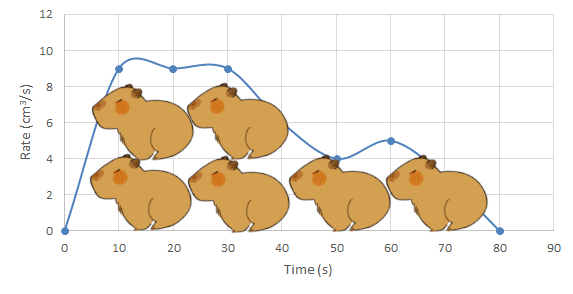

En este ejemplo, podriamos estimar la integral como:

$ \int_0^{80} f(t) dt ≈ n_{capibaras} \times A_{capibara}$

Por supuesto, usar al capibara no es una gran opción para este problema: por como fueron acomodados resta mucho espacio vacío. Hay métodos más sistemáticos y de uso general que abordaremos a continuación.

### Sumas de Riemann: Rectangulos

El método numérico que usaremos para obtener la integral es la suma de Riemann, que consiste en sumar el área de objetos conocidos que se ajusten al área bajo la curva, teniendo estos objetos una dependencia de los valores $f(x)$ de la función (a diferencia del capibara).

La primera forma que podemos emplear es un rectángulo. El siguiente diagráma muestra esquemáticamente como funciona el método:




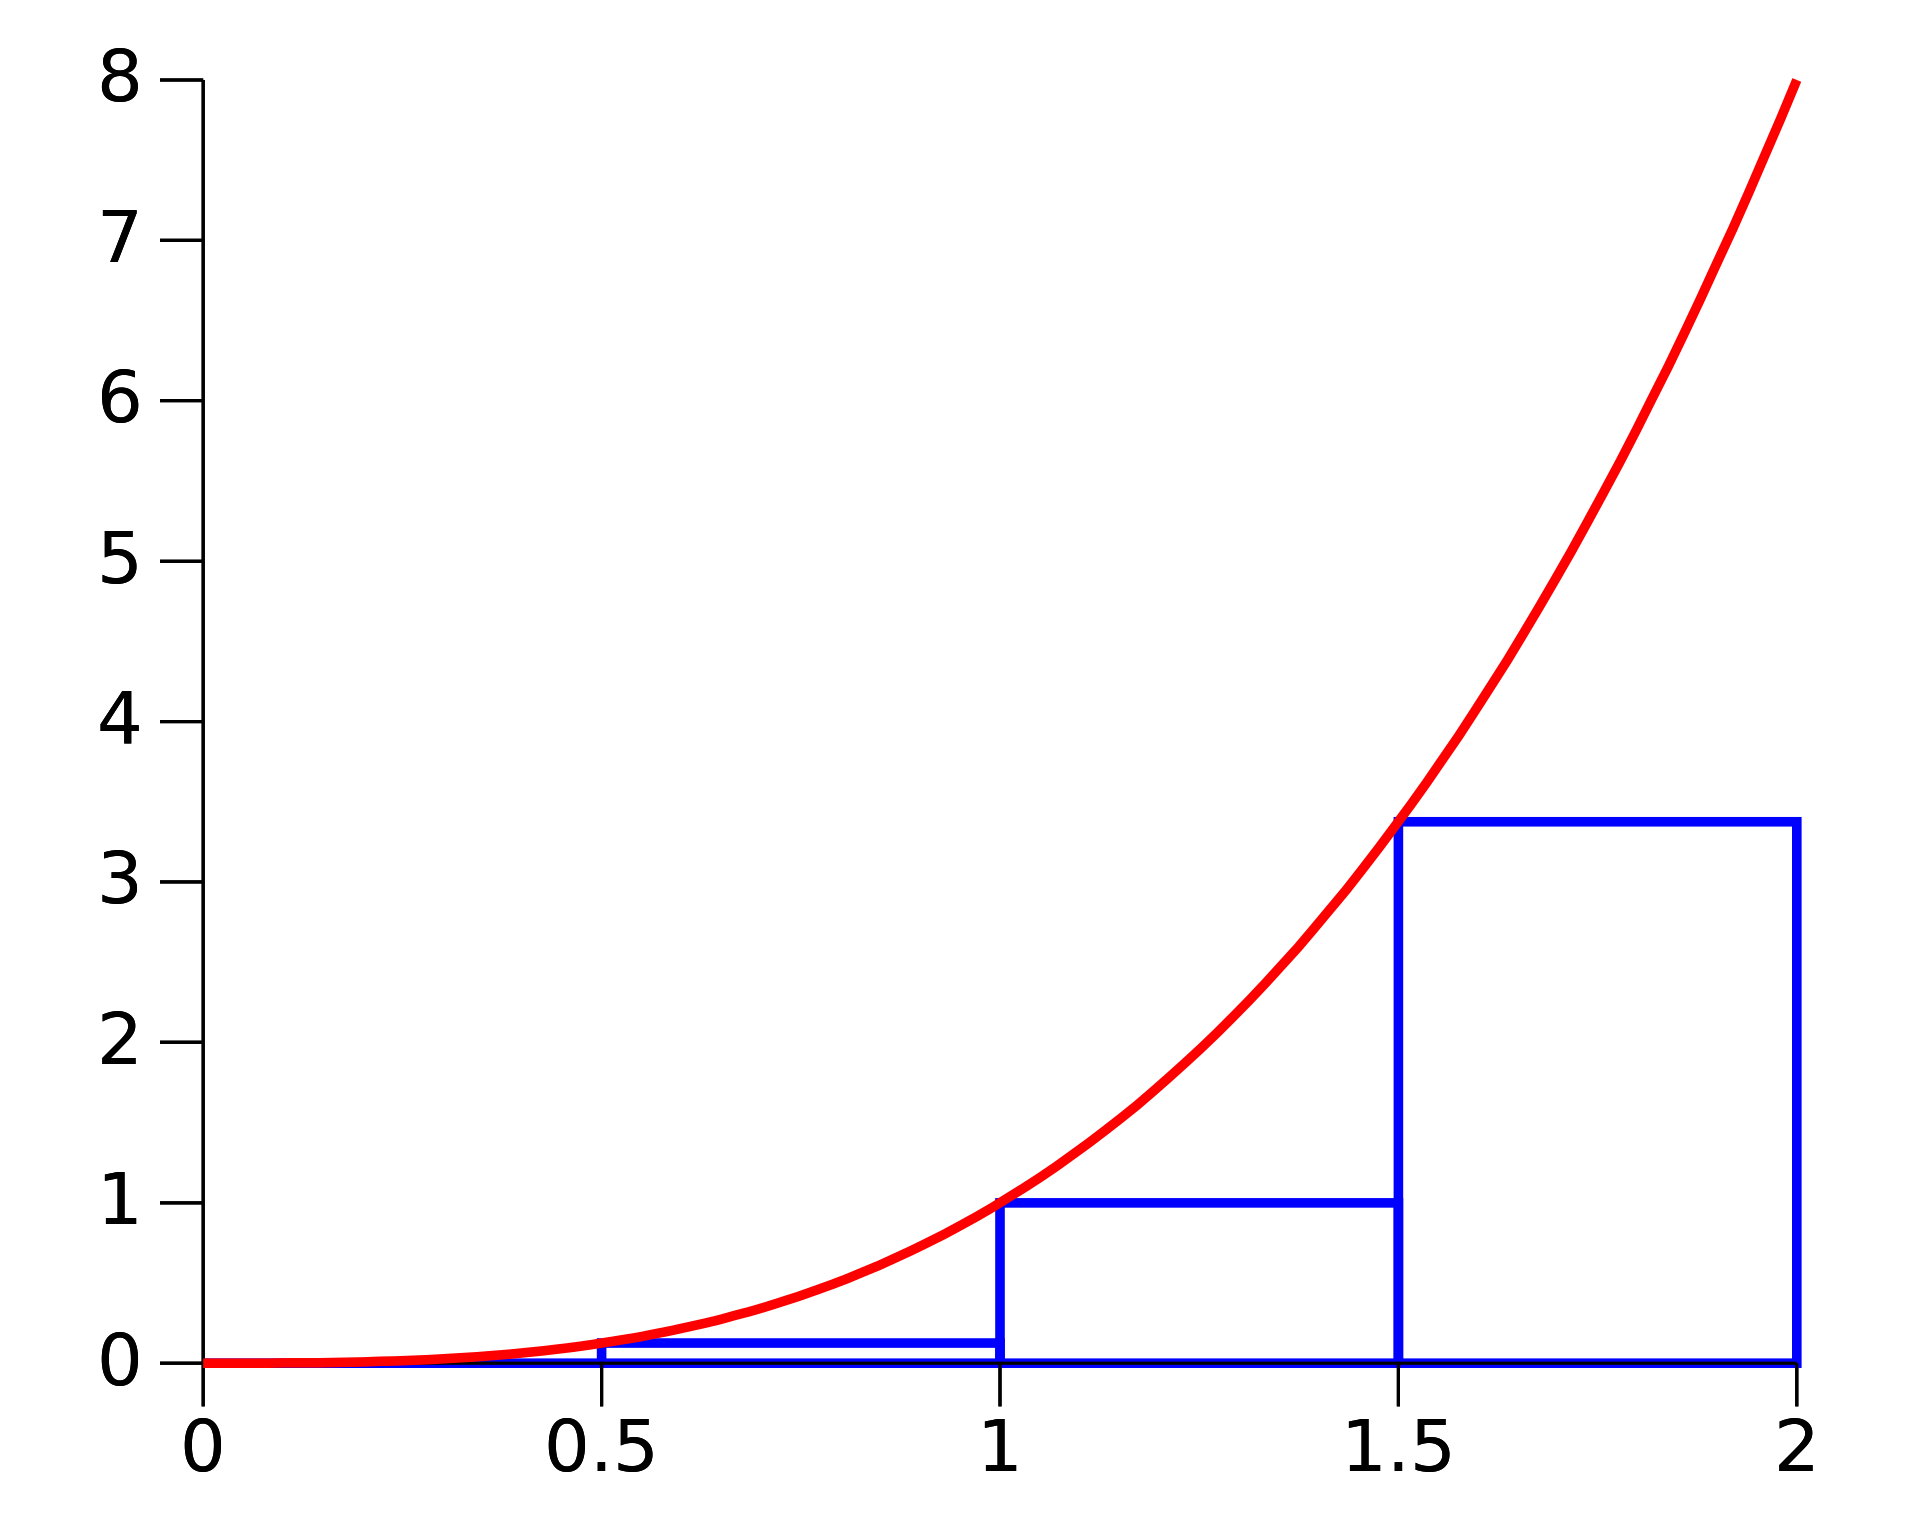

En la imágen, la curva roja representa nuestra $f(x)$, y los rectángulos azules nuestra aproximación de la integral. Nota que la **altura** de cada rectángulo coincide con valores $f(x)$ para $x=0,0.5,1,1.5$. También nota que el ancho está dado por un valor fijo: $\Delta x = 0.5$. La integral se aproxima entonces como:

$$\int_0^2 f(x) dx \approx f(0)*(0.5) + f(0.5)*(0.5) + f(1)*(0.5) + f(1.5)*(0.5)$$

Si bien es práctico que los valores de $x$ estén equiespaciados, cuando trabajamos con datos experimentales esto no siempre será posible. En ese caso, habrá que multiplicar las alturas correspondientes $f(x_i)$ por los anchos específicos $\Delta(x_{i+1}-x_{i})$.

Bajo este método, los pasos a seguir para encontrar la integral son:

1. Definir cuáles son nuestros valores $x$ y cuál es la separación entre ellos.
2. Dados estos puntos, tener en cuenta los valores $f(x)$ que calcularemos o que tenemos.
2. Calcular las áreas de los rectangulos como $f(x_i)*\Delta x$, con $\Delta x$ el ancho del rectángulo asociado a la altura $f(x_i)$.
3. Acumular/sumar todas las áreas calculadas.

El método mostrado se conoce como *suma izquierda*, ya que en el intervalo $[a,b]$ de integración siempre empezamos por el valor $f(a)$ y terminamos con el valor $f(b-\Delta x)$ (observa el diagrama anterior).






Realicemos un ejemplo usando una función conocida: $sen(x)$. Si bien esta tiene una integral definida, utilicemosla como una forma de probar nuestro método.

Sigamos los pasos sugeridos: si deseamos calcular la integral entre -0.5 y 1, establezcamos un conjunto de valores $x$ igualmente espaciados:

In [ ]:
# Primero, indiquemos cuántos puntos queremos
n_puntos = 10
# Luego, calculemos la separación entre los puntos dados los límites
limite_a = 0
limite_b = math.pi
delta_x = (limite_b-limite_a)/n_puntos
# Finalmente, generemos los valores de x
valores_x = [limite_a + delta_x * i for i in range(n_puntos)]
print(valores_x)
print(len(valores_x))

Lo siguiente es calcular los valores $f(x)=y$:




In [ ]:
# Usamos los valores_x para calcular los valores(y)
import math
valores_y = [math.sin(x) for x in valores_x]
print(valores_y)
print(len(valores_y))

Finalmente, sumemos/acumulemos las áreas en una variable:

In [ ]:
integral_sen = 0
for altura in valores_y:
    integral_sen += altura * delta_x
print("La integral calculada con", n_puntos, "puntos es", integral_sen)

Probemos qué tan bueno es nuestro método, usando la integral definida:

$$\int_a^b sen(x) = -cos(b)+cos(a)$$

In [ ]:
integral_definida = -math.cos(limite_b) + math.cos(limite_a)
print("La integral_definida da: ", integral_definida)

Podemos evaluar que tan buena fue nuestra aproximación:

In [ ]:
error = 100*(integral_definida-integral_sen)/integral_definida
print(f"El porcentaje de error de nuestra aproximación respecto al valor exacto es: {error:.2f} %")

Visualiza como este método aproxima el área bajo la curva en el intervalo de x deseado:

In [ ]:
import matplotlib.pyplot as plt
n_puntos_sen = 1000
delta_sen_x = (math.pi)/n_puntos_sen
valores_sen_x = [delta_sen_x * i for i in range(n_puntos_sen)]
valores_sen_y = [math.sin(x) for x in valores_sen_x]
plt.plot(valores_x,valores_y,'ro')
plt.plot(valores_sen_x,valores_sen_y)

Prueba modificando el número de puntos utilizados, y observa como cambia el error cometido.

Existen variaciones a este método:
* El método *por la derecha*, donde empezamos con el valor $f(a+\Delta x)$ y terminamos con el $f(b)$.
* El método *del punto medio*, donde empezamos con el valor $f(a+\frac{\Delta x}{2})$ y terminamos con el $f(b-\frac{\Delta x}{2})$. Hay que tener cierto cuidado en este método: si los datos $f(x)$ ya están dados, puede que no tengamos los valores $f(a+\frac{\Delta x}{2})$, $f(b-\frac{\Delta x}{2})$, ni los valores intermedios.
* El método del trapecio, que en lugar de rectángulos, utiliza trapecios:

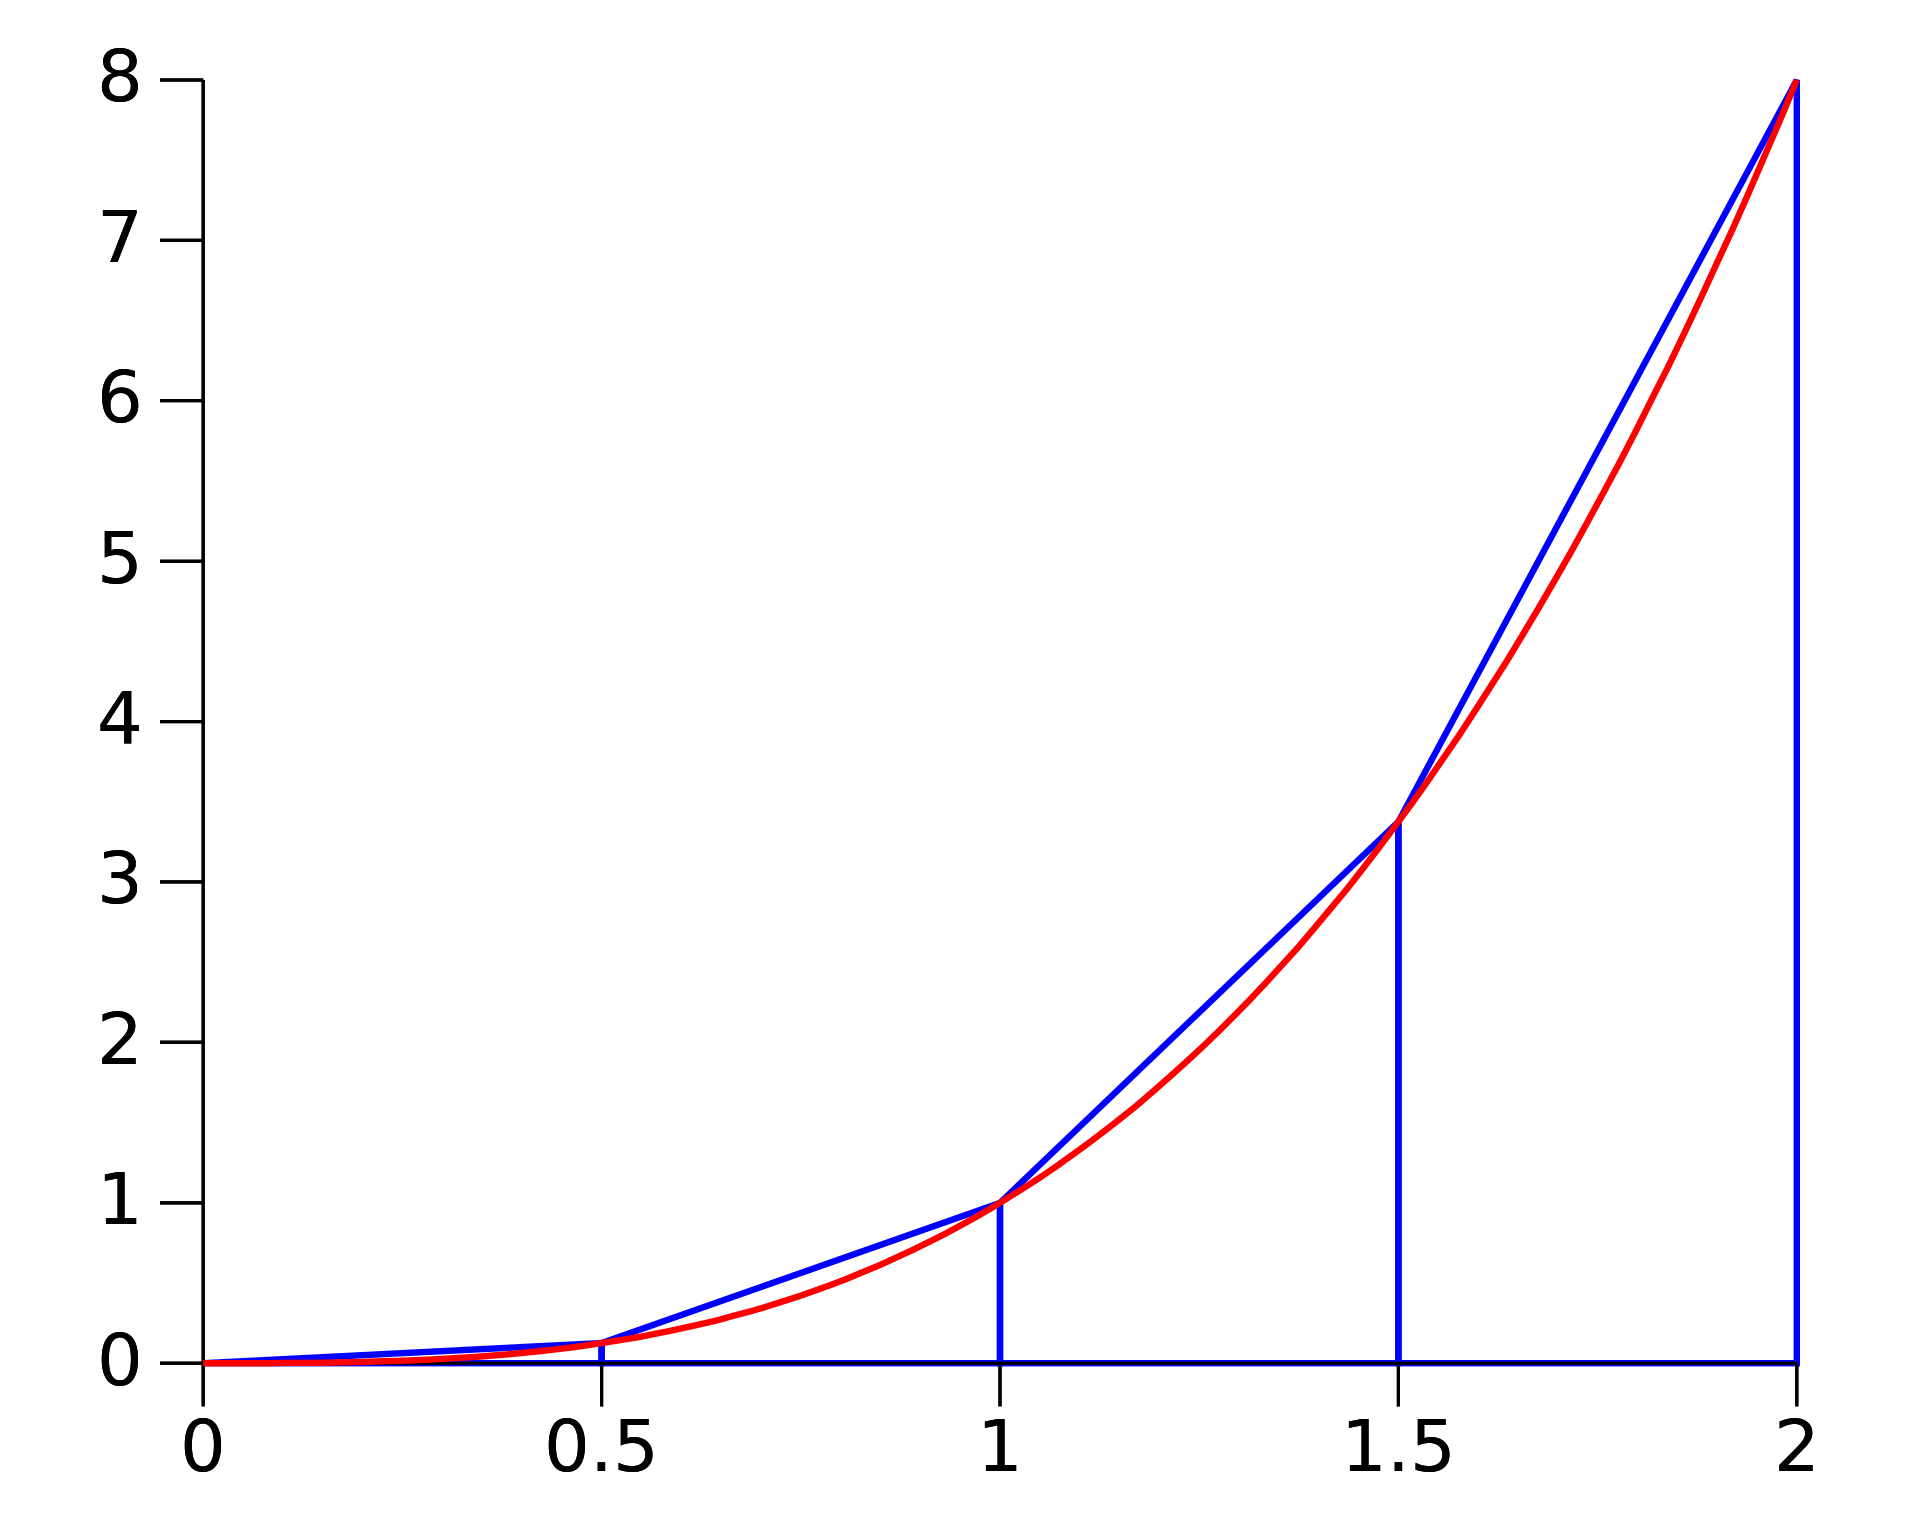

Un método más elaborado y generalmente más previso, el método de Simpson, hace uso de parábolas:


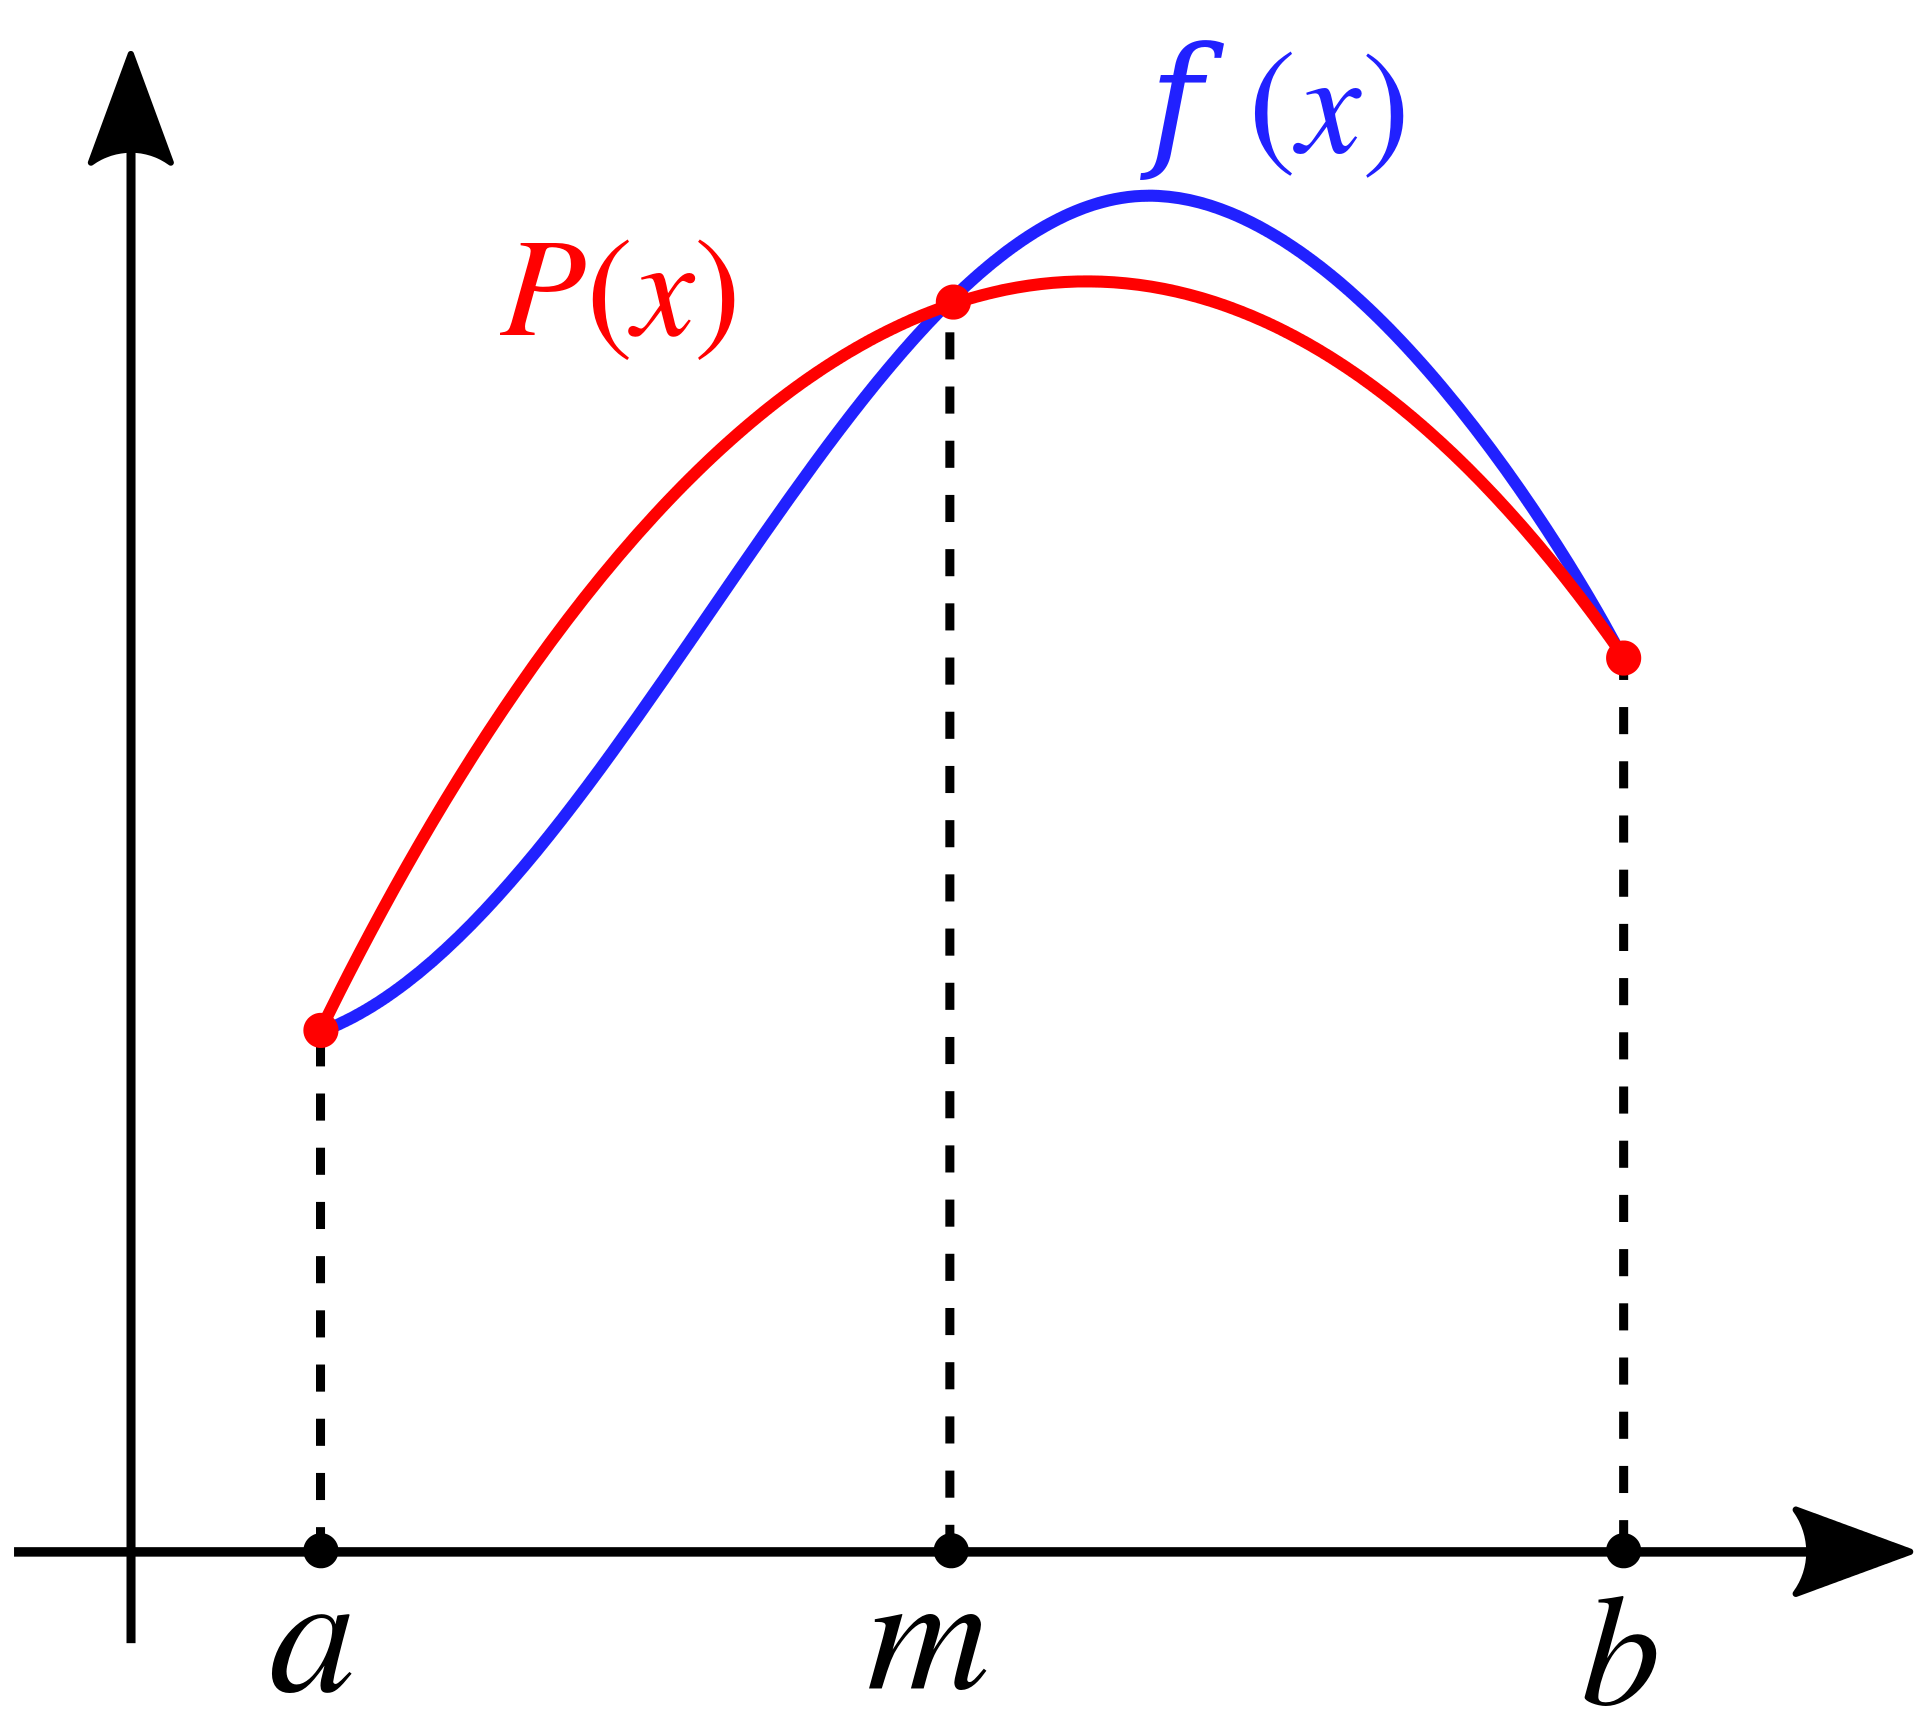

❓ La siguiente celda de código genera dos listas: una de intensidades (llamada `intensidades`) y otra de números de onda (`numeros_onda`). Ambas emulan un espectro IR en la región de stretching del grupo OH. Los datos fueron obtenidos entre 3000-3600 cm^-1, con 1000 puntos en dicha región. Calcula numéricamente la integral bajo la curva.

In [ ]:
# @title Generador de datos de espectro IR
import numpy as np

# Constants for simulating the IR spectrum
center_wavenumber = 3300  # Center wavenumber for OH stretching in cm^-1
intensity_factor = 10000  # Intensity factor for simulating peak intensities
width_factor = 20  # Width factor for simulating peak width

# Generate 1000 wavenumbers in the OH stretching region
wavenumbers = np.linspace(3000, 3600, 1000)

# Simulate the intensities for each wavenumber
intensities = intensity_factor * np.exp(-((wavenumbers - center_wavenumber) / width_factor) ** 2)

# Combine wavenumbers and intensities into a list of points
points = list(zip(wavenumbers, intensities))

numeros_onda = [x[0] for x in points]
intensidades = [x[1] for x in points]

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.xlabel("Número de onda, cm$^{-1}$")
plt.ylabel("Intensidades, u.a.")
plt.plot([x[0] for x in points],[x[1] for x in points])
plt.show()

❓ Las listas de abajo (`volumen` y `presion`) representan una isoterma de adsorción, cuya integral da un estimado de la cantidad de gas adsorbido en una superficie. Obtén el área bajo la curva.

In [ ]:
# @title Listas del isoterma de adsorción
volumen = [0.1, 0.10180360721442887, 0.10360721442885772, 0.10541082164328658, 0.10721442885771544, 0.10901803607214429, 0.11082164328657315, 0.11262525050100201, 0.11442885771543086, 0.11623246492985972, 0.11803607214428859, 0.11983967935871745, 0.1216432865731463, 0.12344689378757516, 0.12525050100200402, 0.12705410821643287, 0.12885771543086172, 0.1306613226452906, 0.13246492985971944, 0.13426853707414832, 0.13607214428857717, 0.13787575150300602, 0.13967935871743486, 0.14148296593186374, 0.1432865731462926, 0.14509018036072147, 0.14689378757515031, 0.14869739478957916, 0.150501002004008, 0.1523046092184369, 0.15410821643286574, 0.1559118236472946, 0.15771543086172346, 0.1595190380761523, 0.16132264529058116, 0.16312625250501003, 0.16492985971943888, 0.16673346693386776, 0.1685370741482966, 0.17034068136272545, 0.1721442885771543, 0.17394789579158318, 0.17575150300601203, 0.1775551102204409, 0.17935871743486975, 0.1811623246492986, 0.18296593186372745, 0.18476953907815633, 0.18657314629258517, 0.18837675350701405, 0.1901803607214429, 0.19198396793587175, 0.1937875751503006, 0.19559118236472947, 0.19739478957915832, 0.1991983967935872, 0.20100200400801604, 0.2028056112224449, 0.20460921843687374, 0.20641282565130262, 0.20821643286573147, 0.21002004008016034, 0.2118236472945892, 0.21362725450901804, 0.2154308617234469, 0.21723446893787576, 0.2190380761523046, 0.2208416833667335, 0.22264529058116234, 0.22444889779559118, 0.22625250501002006, 0.2280561122244489, 0.22985971943887776, 0.23166332665330663, 0.23346693386773548, 0.23527054108216433, 0.2370741482965932, 0.23887775551102206, 0.2406813627254509, 0.24248496993987978, 0.24428857715430863, 0.24609218436873748, 0.24789579158316635, 0.2496993987975952, 0.251503006012024, 0.2533066132264529, 0.2551102204408818, 0.2569138276553106, 0.2587174348697395, 0.2605210420841684, 0.2623246492985972, 0.26412825651302607, 0.2659318637274549, 0.26773547094188377, 0.2695390781563126, 0.27134268537074147, 0.2731462925851703, 0.2749498997995992, 0.27675350701402807, 0.2785571142284569, 0.2803607214428858, 0.28216432865731467, 0.2839679358717435, 0.28577154308617236, 0.2875751503006012, 0.28937875751503006, 0.2911823647294589, 0.29298597194388776, 0.2947895791583166, 0.2965931863727455, 0.29839679358717436, 0.3002004008016032, 0.3020040080160321, 0.30380761523046096, 0.3056112224448898, 0.30741482965931866, 0.3092184368737475, 0.31102204408817635, 0.3128256513026052, 0.31462925851703405, 0.3164328657314629, 0.3182364729458918, 0.32004008016032065, 0.3218436873747495, 0.3236472945891784, 0.32545090180360725, 0.3272545090180361, 0.32905811623246495, 0.3308617234468938, 0.33266533066132264, 0.3344689378757515, 0.33627254509018034, 0.3380761523046092, 0.3398797595190381, 0.34168336673346694, 0.3434869739478958, 0.3452905811623247, 0.34709418837675354, 0.3488977955911824, 0.35070140280561124, 0.3525050100200401, 0.35430861723446894, 0.3561122244488978, 0.35791583166332663, 0.3597194388777555, 0.36152304609218433, 0.3633266533066133, 0.36513026052104214, 0.366933867735471, 0.36873747494989983, 0.3705410821643287, 0.37234468937875753, 0.3741482965931864, 0.37595190380761523, 0.3777555110220441, 0.3795591182364729, 0.3813627254509018, 0.3831663326653306, 0.3849699398797596, 0.38677354709418843, 0.3885771543086173, 0.3903807615230461, 0.392184368737475, 0.3939879759519038, 0.39579158316633267, 0.3975951903807615, 0.39939879759519037, 0.4012024048096192, 0.40300601202404807, 0.4048096192384769, 0.4066132264529059, 0.4084168336673347, 0.41022044088176357, 0.4120240480961924, 0.41382765531062127, 0.4156312625250501, 0.41743486973947896, 0.4192384769539078, 0.42104208416833666, 0.4228456913827655, 0.42464929859719436, 0.4264529058116232, 0.42825651302605217, 0.430060120240481, 0.43186372745490986, 0.4336673346693387, 0.43547094188376756, 0.4372745490981964, 0.43907815631262526, 0.4408817635270541, 0.44268537074148295, 0.4444889779559118, 0.44629258517034065, 0.4480961923847695, 0.44989979959919846, 0.4517034068136273, 0.45350701402805615, 0.455310621242485, 0.45711422845691385, 0.4589178356713427, 0.46072144288577155, 0.4625250501002004, 0.46432865731462925, 0.4661322645290581, 0.46793587174348694, 0.4697394789579158, 0.47154308617234475, 0.4733466933867736, 0.47515030060120245, 0.4769539078156313, 0.47875751503006014, 0.480561122244489, 0.48236472945891784, 0.4841683366733467, 0.48597194388777554, 0.4877755511022044, 0.48957915831663323, 0.4913827655310621, 0.49318637274549104, 0.4949899799599199, 0.49679358717434874, 0.4985971943887776, 0.5004008016032064, 0.5022044088176353, 0.5040080160320641, 0.505811623246493, 0.5076152304609218, 0.5094188376753507, 0.5112224448897795, 0.5130260521042084, 0.5148296593186373, 0.5166332665330662, 0.518436873747495, 0.5202404809619239, 0.5220440881763527, 0.5238476953907816, 0.5256513026052104, 0.5274549098196393, 0.5292585170340681, 0.531062124248497, 0.5328657314629258, 0.5346693386773547, 0.5364729458917836, 0.5382765531062125, 0.5400801603206413, 0.5418837675350702, 0.543687374749499, 0.5454909819639279, 0.5472945891783567, 0.5490981963927856, 0.5509018036072144, 0.5527054108216433, 0.5545090180360721, 0.556312625250501, 0.5581162324649299, 0.5599198396793588, 0.5617234468937876, 0.5635270541082165, 0.5653306613226453, 0.5671342685370742, 0.568937875751503, 0.5707414829659319, 0.5725450901803607, 0.5743486973947896, 0.5761523046092184, 0.5779559118236474, 0.5797595190380762, 0.5815631262525051, 0.5833667334669339, 0.5851703406813628, 0.5869739478957916, 0.5887775551102205, 0.5905811623246493, 0.5923847695390781, 0.594188376753507, 0.5959919839679358, 0.5977955911823647, 0.5995991983967937, 0.6014028056112224, 0.6032064128256512, 0.6050100200400802, 0.606813627254509, 0.6086172344689379, 0.6104208416833667, 0.6122244488977956, 0.6140280561122244, 0.6158316633266533, 0.6176352705410821, 0.619438877755511, 0.6212424849699398, 0.6230460921843687, 0.6248496993987975, 0.6266533066132265, 0.6284569138276553, 0.6302605210420842, 0.632064128256513, 0.6338677354709419, 0.6356713426853707, 0.6374749498997996, 0.6392785571142284, 0.6410821643286573, 0.6428857715430861, 0.644689378757515, 0.6464929859719438, 0.6482965931863728, 0.6501002004008016, 0.6519038076152305, 0.6537074148296593, 0.6555110220440882, 0.657314629258517, 0.6591182364729459, 0.6609218436873747, 0.6627254509018036, 0.6645290581162324, 0.6663326653306613, 0.6681362725450901, 0.6699398797595191, 0.6717434869739479, 0.6735470941883768, 0.6753507014028056, 0.6771543086172345, 0.6789579158316633, 0.6807615230460922, 0.682565130260521, 0.6843687374749499, 0.6861723446893787, 0.6879759519038076, 0.6897795591182364, 0.6915831663326654, 0.6933867735470942, 0.6951903807615231, 0.6969939879759519, 0.6987975951903808, 0.7006012024048096, 0.7024048096192385, 0.7042084168336673, 0.7060120240480962, 0.707815631262525, 0.7096192384769539, 0.7114228456913827, 0.7132264529058117, 0.7150300601202405, 0.7168336673346694, 0.7186372745490982, 0.720440881763527, 0.7222444889779559, 0.7240480961923847, 0.7258517034068136, 0.7276553106212424, 0.7294589178356713, 0.7312625250501001, 0.733066132264529, 0.734869739478958, 0.7366733466933868, 0.7384769539078156, 0.7402805611222445, 0.7420841683366733, 0.7438877755511022, 0.745691382765531, 0.7474949899799599, 0.7492985971943887, 0.7511022044088176, 0.7529058116232464, 0.7547094188376753, 0.7565130260521042, 0.7583166332665331, 0.7601202404809619, 0.7619238476953908, 0.7637274549098196, 0.7655310621242485, 0.7673346693386773, 0.7691382765531062, 0.770941883767535, 0.7727454909819639, 0.7745490981963927, 0.7763527054108216, 0.7781563126252505, 0.7799599198396794, 0.7817635270541082, 0.7835671342685371, 0.7853707414829659, 0.7871743486973948, 0.7889779559118236, 0.7907815631262525, 0.7925851703406813, 0.7943887775551102, 0.796192384769539, 0.797995991983968, 0.7997995991983968, 0.8016032064128257, 0.8034068136272545, 0.8052104208416834, 0.8070140280561122, 0.8088176352705411, 0.8106212424849699, 0.8124248496993988, 0.8142284569138276, 0.8160320641282565, 0.8178356713426853, 0.8196392785571143, 0.8214428857715431, 0.823246492985972, 0.8250501002004008, 0.8268537074148297, 0.8286573146292585, 0.8304609218436874, 0.8322645290581162, 0.8340681362725451, 0.8358717434869739, 0.8376753507014028, 0.8394789579158316, 0.8412825651302606, 0.8430861723446894, 0.8448897795591183, 0.8466933867735471, 0.848496993987976, 0.8503006012024048, 0.8521042084168337, 0.8539078156312625, 0.8557114228456913, 0.8575150300601202, 0.859318637274549, 0.8611222444889779, 0.8629258517034069, 0.8647294589178357, 0.8665330661322646, 0.8683366733466934, 0.8701402805611222, 0.8719438877755511, 0.87374749498998, 0.8755511022044088, 0.8773547094188376, 0.8791583166332665, 0.8809619238476953, 0.8827655310621242, 0.8845691382765531, 0.886372745490982, 0.8881763527054108, 0.8899799599198397, 0.8917835671342685, 0.8935871743486974, 0.8953907815631262, 0.8971943887775551, 0.8989979959919839, 0.9008016032064128, 0.9026052104208416, 0.9044088176352705, 0.9062124248496994, 0.9080160320641283, 0.9098196392785571, 0.911623246492986, 0.9134268537074148, 0.9152304609218437, 0.9170340681362725, 0.9188376753507014, 0.9206412825651302, 0.9224448897795591, 0.9242484969939879, 0.9260521042084168, 0.9278557114228457, 0.9296593186372746, 0.9314629258517034, 0.9332665330661323, 0.9350701402805611, 0.93687374749499, 0.9386773547094188, 0.9404809619238477, 0.9422845691382765, 0.9440881763527054, 0.9458917835671342, 0.9476953907815631, 0.949498997995992, 0.9513026052104209, 0.9531062124248497, 0.9549098196392786, 0.9567134268537074, 0.9585170340681363, 0.9603206412825651, 0.962124248496994, 0.9639278557114228, 0.9657314629258517, 0.9675350701402805, 0.9693386773547094, 0.9711422845691383, 0.9729458917835672, 0.974749498997996, 0.9765531062124249, 0.9783567134268537, 0.9801603206412826, 0.9819639278557114, 0.9837675350701403, 0.9855711422845691, 0.987374749498998, 0.9891783567134268, 0.9909819639278556, 0.9927855711422846, 0.9945891783567135, 0.9963927855711423, 0.9981963927855712, 1.0]
presion = [0.25, 0.25336658354114716, 0.2567030784508441, 0.2600098863074642, 0.2632874015748032, 0.2665360117589417, 0.2697560975609756, 0.27294803302574067, 0.27611218568665374, 0.27924891670678864, 0.2823585810162992, 0.28544152744630075, 0.2884980988593156, 0.2915286322763843, 0.2945334590009425, 0.2975129047395589, 0.30046728971962616, 0.30339692880409497, 0.30630213160333647, 0.30918320258421783, 0.3120404411764706, 0.3148741418764302, 0.31768459434822244, 0.32047208352246936, 0.3232368896925859, 0.3259792886087349, 0.32869955156950675, 0.331397945511389, 0.33407473309608543, 0.33673017279574663, 0.3393645189761695, 0.341978021978022, 0.34457092819614715, 0.3471434801569996, 0.34969591659426585, 0.35222847252271744, 0.35474137931034483, 0.35723486474881927, 0.3597091531223268, 0.36216446527481894, 0.3646010186757216, 0.36701902748414383, 0.36941870261162596, 0.37180025178346626, 0.3741638795986622, 0.3765097875885048, 0.3788381742738589, 0.3811492352211658, 0.38344316309719934, 0.3857201477226098, 0.38798037612428454, 0.3902240325865581, 0.3924512987012987, 0.3946623534169026, 0.3968573730862208, 0.3990365315134484, 0.4012, 0.4033479473893982, 0.40548054011119933, 0.407597942223981, 0.40970031545741326, 0.41178781925343816, 0.41386061080657793, 0.4159188451033945, 0.4179626749611198, 0.41999225106547855, 0.422007722007722, 0.42400923432089266, 0.4259969325153375, 0.4279709591134887, 0.42993145468392996, 0.4318785578747628, 0.43381240544629346, 0.43573313230305316, 0.43764087152516906, 0.4395357543991015, 0.44141791044776124, 0.44328746746002234, 0.4451445515196442, 0.4469892870336166, 0.44882179675994105, 0.4506422018348624, 0.4524506217995611, 0.4542471746263215, 0.456031976744186, 0.45780514306410725, 0.45956678700361014, 0.4613170205109752, 0.4630559540889528, 0.4647836968180193, 0.4665003563791875, 0.46820603907637653, 0.469900849858357, 0.4715848923402753, 0.47325826882477134, 0.47492108032269376, 0.4765734265734266, 0.478215406064831, 0.4798471160528145, 0.48146865258053345, 0.4830801104972376, 0.48468158347676427, 0.48627316403568976, 0.48785494355114617, 0.4894270122783083, 0.4909894593675621, 0.4925423728813559, 0.49408583981074694, 0.49561994609164417, 0.4971447766207592, 0.4986604152712659, 0.5001669449081803, 0.5016644474034622, 0.5031530036508464, 0.5046326935804104, 0.5061035961728803, 0.5075657894736842, 0.5090193506067563, 0.5104643557880968, 0.5119008803390935, 0.5133289986996099, 0.5147487844408428, 0.5161603102779574, 0.5175636480825008, 0.5189588688946015, 0.5203460429349568, 0.5217252396166134, 0.5230965275565468, 0.5244599745870394, 0.5258156477668673, 0.5271636133922931, 0.528503937007874, 0.5298366834170853, 0.5311619166927655, 0.5324797001873829, 0.533790096543133, 0.5350931677018634, 0.5363889749148343, 0.5376775787523164, 0.5389590391130273, 0.5402334152334153, 0.5415007656967841, 0.5427611484422725, 0.5440146207736826, 0.5452612393681653, 0.5465010602847621, 0.5477341389728096, 0.548960530280205, 0.5501802884615384, 0.5513934671860954, 0.5526001195457262, 0.5538002980625932, 0.5549940546967895, 0.5561814408538394, 0.5573625073920756, 0.5585373046299027, 0.5597058823529412, 0.560868289821062, 0.5620245757753073, 0.5631747884447038, 0.5643189755529686, 0.5654571843251088, 0.5665894614939202, 0.5677158533063817, 0.568836405529954, 0.5699511634587762, 0.5710601719197709, 0.572163475278651, 0.5732611174458381, 0.574353141882286, 0.5754395916052184, 0.5765205091937766, 0.5775959367945824, 0.5786659161272165, 0.5797304884896125, 0.5807896947633717, 0.5818435754189943, 0.5828921705210366, 0.583935519733185, 0.5849736623232604, 0.5860066371681415, 0.5870344827586207, 0.5880572372041828, 0.5890749382377162, 0.5900876232201534, 0.5910953291450424, 0.5920980926430518, 0.5930959499864094, 0.5940889370932756, 0.595077089532053, 0.5960604425256342, 0.5970390309555854, 0.5980128893662728, 0.5989820519689257, 0.599946552645644, 0.6009064249533459, 0.6018617021276595, 0.6028124170867605, 0.6037586024351509, 0.6047002904673885, 0.6056375131717597, 0.6065703022339028, 0.6074986890403775, 0.6084227046821868, 0.6093423799582462, 0.6102577453788076, 0.6111688311688313, 0.6120756672713138, 0.6129782833505688, 0.6138767087954604, 0.614770972722594, 0.6156611039794608, 0.616547131147541, 0.6174290825453616, 0.6183069862315146, 0.6191808700076316, 0.6200507614213199, 0.6209166877690554, 0.6217786760990399, 0.6226367532140157, 0.6234909456740443, 0.6243412797992473, 0.6251877816725088, 0.6260304771421434, 0.6268693918245264, 0.6277045511066899, 0.6285359801488833, 0.6293637038871008, 0.6301877470355731, 0.6310081340892285, 0.6318248893261191, 0.6326380368098159, 0.6334476003917728, 0.6342536037136575, 0.6350560702096539, 0.6358550231087327, 0.6366504854368933, 0.6374424800193751, 0.638231029482842, 0.6390161562575355, 0.6397978825794033, 0.6405762304921968, 0.6413512218495447, 0.6421228783169974, 0.6428912213740458, 0.6436562723161153, 0.644418052256532, 0.6451765821284665, 0.6459318826868495, 0.6466839745102667, 0.6474328780028261, 0.6481786133960047, 0.648921200750469, 0.649660659957875, 0.6503970107426437, 0.6511302726637147, 0.6518604651162792, 0.652587607333488, 0.6533117183881427, 0.6540328171943609, 0.6547509225092252, 0.6554660529344073, 0.6561782269177768, 0.6568874627549851, 0.6575937785910339, 0.6582971924218216, 0.658997722095672, 0.6596953853148444, 0.6603901996370236, 0.6610821824767943, 0.6617713511070944, 0.662457722660654, 0.6631413141314131, 0.6638221423759264, 0.6645002241147467, 0.6651755759337956, 0.6658482142857143, 0.6665181554912007, 0.667185415740329, 0.667850011093854, 0.6685119574844997, 0.669171270718232, 0.6698279664755183, 0.6704820603125687, 0.6711335676625659, 0.6717825038368779, 0.6724288840262582, 0.6730727233020309, 0.6737140366172625, 0.6743528388079182, 0.6749891445940078, 0.675622968580715, 0.6762543252595156, 0.6768832290092813, 0.6775096940973718, 0.6781337346807139, 0.6787553648068669, 0.6793745984150782, 0.6799914493373236, 0.6806059312993387, 0.6812180579216354, 0.6818278427205101, 0.6824352991090369, 0.6830404403980521, 0.683643279797126, 0.6842438304155242, 0.6848421052631579, 0.6854381172515234, 0.6860318791946309, 0.6866234038099225, 0.687212703719181, 0.6877997914494265, 0.6883846794338052, 0.6889673800124662, 0.6895479054334301, 0.6901262678534464, 0.690702479338843, 0.6912765518663643, 0.6918484973240017, 0.6924183275118143, 0.69298605414274, 0.6935516888433982, 0.6941152431548835, 0.6946767285335509, 0.6952361563517915, 0.695793537898801, 0.6963488843813387, 0.6969022069244787, 0.6974535165723525, 0.6980028242888844, 0.698550140958518, 0.6990954773869347, 0.6996388443017657, 0.7001802523532946, 0.7007197121151539, 0.701257234085013, 0.701792828685259, 0.7023265062636707, 0.702858277094085, 0.7033881513770557, 0.7039161392405063, 0.7044422507403751, 0.7049664958612534, 0.7054888845170175, 0.7060094265514533, 0.7065281317388747, 0.7070450097847357, 0.7075600703262356, 0.7080733229329172, 0.7085847771072611, 0.7090944422852701, 0.7096023278370515, 0.7101084430673896, 0.7106127972163154, 0.7111153994596682, 0.7116162589096513, 0.7121153846153847, 0.7126127855634479, 0.7131084706784209, 0.7136024488234168, 0.7140947288006112, 0.7145853193517635, 0.7150742291587362, 0.7155614668440052, 0.7160470409711684, 0.716530960045446, 0.7170132325141777, 0.7174938667673146, 0.717972871137905, 0.7184502539025767, 0.7189260232820127, 0.7194001874414246, 0.719872754491018, 0.7203437324864562, 0.7208131294293174, 0.7212809532675479, 0.7217472118959108, 0.7222119131564297, 0.7226750648388293, 0.7231366746809691, 0.7235967503692763, 0.7240552995391705, 0.7245123297754877, 0.7249678486128973, 0.725421863536317, 0.725874381981322, 0.7263254113345521, 0.7267749589341121, 0.7272230320699709, 0.7276696379843551, 0.7281147838721395, 0.7285584768812331, 0.7290007241129616, 0.7294415326224472, 0.7298809094189823, 0.7303188614664025, 0.7307553956834532, 0.7311905189441552, 0.7316242380781641, 0.7320565598711294, 0.7324874910650465, 0.7329170383586083, 0.7333452084075526, 0.7337720078250044, 0.7341974431818182, 0.7346215210069136, 0.7350442477876107, 0.7354656299699593, 0.7358856739590685, 0.7363043861194293, 0.7367217727752374, 0.7371378402107112, 0.7375525946704067, 0.7379660423595309, 0.7383781894442503, 0.7387890420519979, 0.739198606271777, 0.7396068881544617, 0.7400138937130948, 0.7404196289231837, 0.7408240997229917, 0.7412273120138289, 0.7416292716603382, 0.7420299844907806, 0.7424294562973159, 0.7428276928362824, 0.7432246998284735, 0.7436204829594109, 0.744015047879617, 0.744408400204883, 0.744800545516536, 0.7451914893617021, 0.7455812372535691, 0.7459697946716443, 0.7463571670620129, 0.746743359837591, 0.7471283783783783, 0.7475122280317086, 0.7478949141124958, 0.7482764419034807, 0.7486568166554735, 0.7490360435875943, 0.7494141278875125, 0.7497910747116832, 0.7501668891855807, 0.7505415764039327, 0.7509151414309484, 0.7512875893005483, 0.7516589250165893, 0.7520291535530893, 0.7523982798544493, 0.752766308835673, 0.7531332453825857, 0.75349909435205, 0.7538638605721802, 0.7542275488425546, 0.7545901639344262, 0.7549517105909314, 0.7553121935272965, 0.7556716174310429, 0.7560299869621904, 0.7563873067534581, 0.7567435814104647, 0.757098815511926, 0.757453013609851, 0.7578061802297363, 0.7581583198707592, 0.7585094370059687, 0.7588595360824741, 0.7592086215216343, 0.7595566977192418, 0.7599037690457097, 0.7602498398462525, 0.7605949144410683, 0.760938997125519, 0.7612820921703077, 0.7616242038216561, 0.7619653363014788, 0.762305493807558, 0.7626446805137149, 0.7629829005699811, 0.7633201581027668, 0.7636564572150301, 0.7639918019864418, 0.7643261964735516, 0.7646596447099513, 0.7649921507064364, 0.765323718451168, 0.7656543519098309, 0.7659840550257934, 0.7663128317202622, 0.7666406858924396, 0.7669676214196762, 0.7672936421576247, 0.7676187519403912, 0.7679429545806852, 0.768266253869969, 0.7685886535786056, 0.768910157456005, 0.7692307692307692]

## Resolución de ecuaciones: Método de bisección

Consideremos la siguiente reacción genérica:

$$ 2A + B \rightleftharpoons C $$

La expresión de la constante de equilibrio ($K$) para esta reacción es:

$$K_{eq} = \frac{[C]_{eq}}{[A]_{eq}^2[B]_{eq}} $$

Usando $x$ como la cantidad producida de $C$, tenemos:

$$K_{eq} = \frac{[C]_0+x}{([A]_0-2x)^2([B]_0-x)} $$

Tenemos los siguientes datos: $K_{eq} = 0.015, [A]_{0}= 42, [B]_{0}=30, [C]_{0}=4$, y deseamos encontrar $x$

Esta ecuación, y otras con estequiometrías o relaciones más complejas, resultan complicadas de resolver ya que despejar $x$ no es trivial: la ecuación no es lineal respecto a $x$.

Para resolver nuestro problema podemos recurrir a métodos numéricos para encontrar soluciones aproximadas, como el método de bisección, el método de Newton-Raphson u otros métodos de iteración numérica. Veamos como funciona el método de la bisección:

1. El método de la bisección nos permite encontrar una raíz de una ecuación. Es decir, resolver: $f(x) = 0$. En ese sentido, debemos primero convertir nuestra ecuación a esta forma (en este caso, nos conviente despejar hacia la izquierda).

2. Veamos el siguiente diagrama:

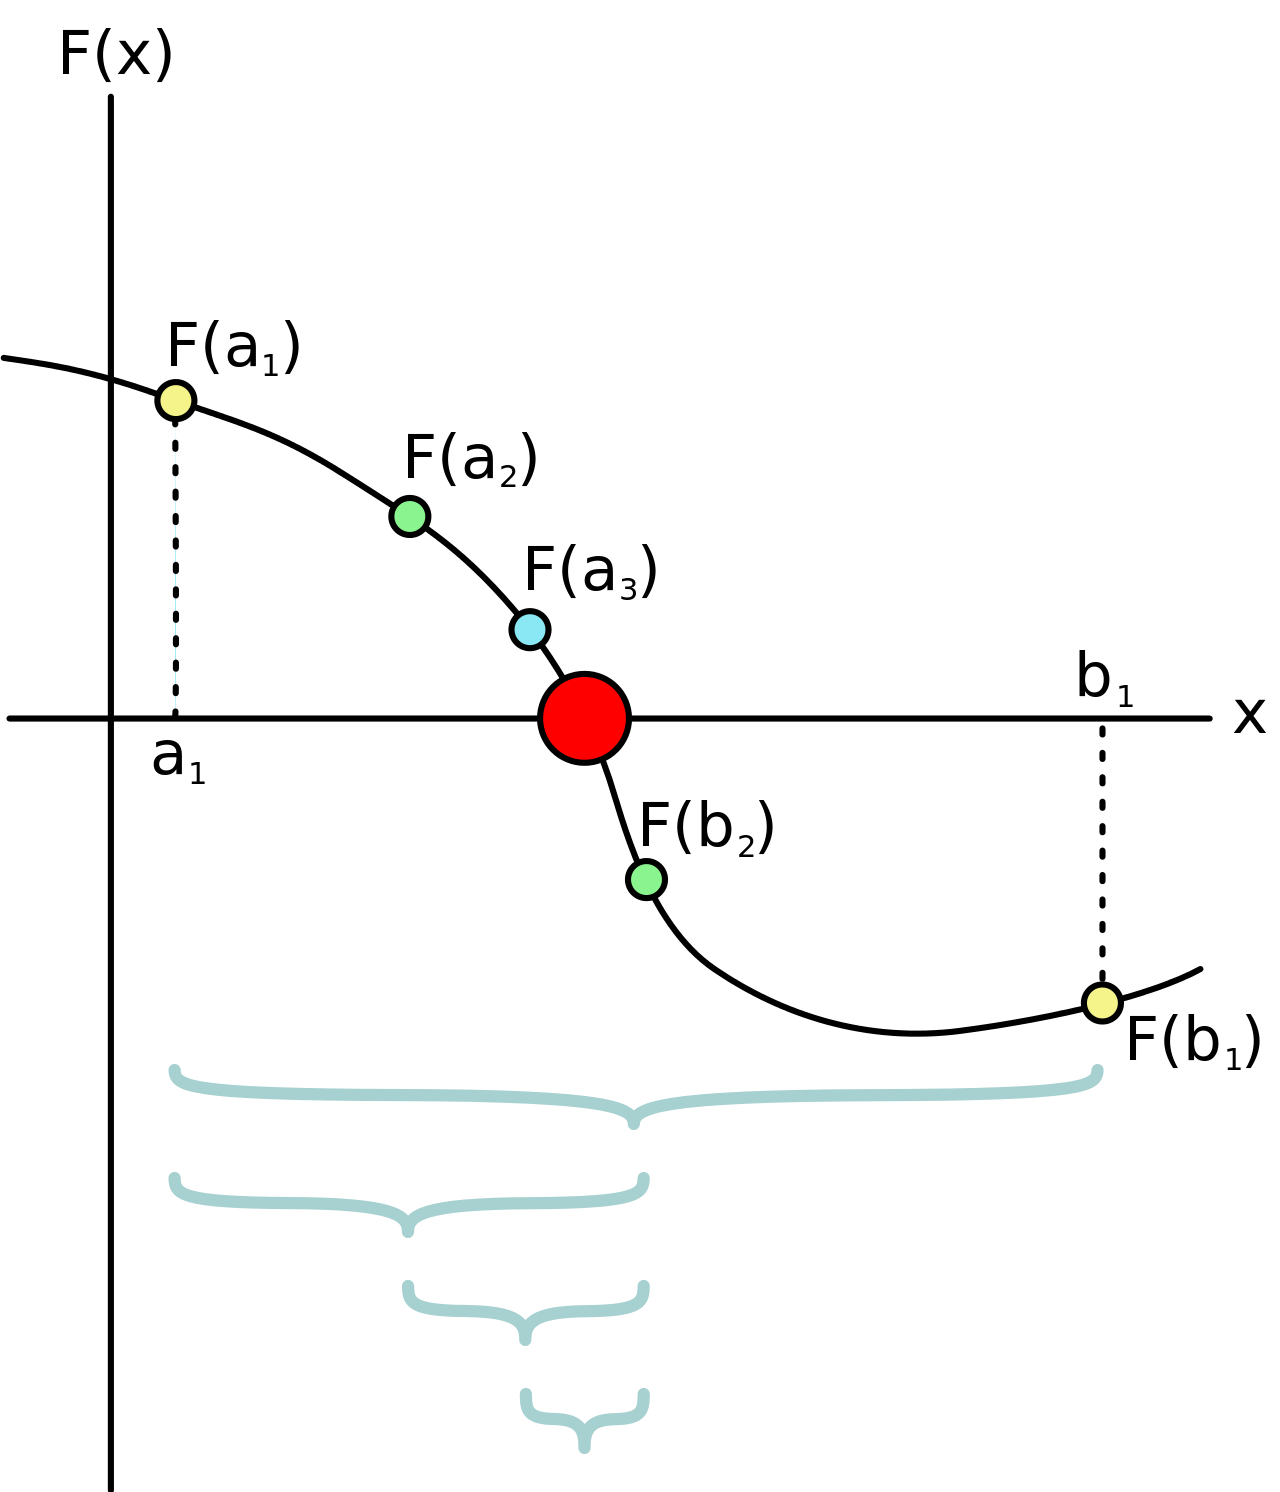

Primero establecemos dos valores de $x$, $a$ y $b$ ($a<b$), para los cuáles $f(a) > 0$ y $f(b) < 0$ (o $f(a) < 0$ y $f(b) > 0$). Este cambio de signo es importante pues indica que, en algún punto, $f(x) = 0$. Si no existe este cambio de signo, el método no funcionará.

3. Calculamos el punto medio entre $a$ y $b$,
$$c=\frac{a+b}{2},$$
y calculamos $f(c)$. Según obtengamos un signo positivo o negativo, sustituímos tomamos ahora como $a$ o como $b$ el punto medio $c$. En el diagrama, $c$ dio  $f(c)<0$, y dado que $f(b)<0$, se sustituye $b$ por $c$ (el punto $b_2$ en el diagrama).

4. Se vuelve a calcular el punto medio entre $a$ y $b$, repitiendo el punto 3 hasta que $f(c)\approx 0$. Nota que el punto medio entre $a_3$ y $b_2$ está muy cercano a la raíz que buscamos.

Veamos como traducimos esto a un código de Python:

Primero, definimos la función cuya raíz buscamos por practicidad:

In [ ]:
def equilibrio(x,K,a,b,c):
    termino1 = c + x
    termino2 = (a - 2*x)**2
    termino3 = b-x
    return K*(termino2*termino3) - termino1

In [ ]:
# Podemos hacer una gráfica, para tener una idea del problema.
# En ciertas condiciones, esto quizá no sea posible
import matplotlib.pyplot as plt
x = [10 + i for i in range(20)]
y = [equilibrio(val,Keq,cA,cB,cC) for val in x]
plt.plot(x,y)

Ahora, propongamos un par de valors de $x$ que tengan sentido físico, pues esto ayudará a que encontremos la raíz. Probemos hasta encontrar un par adecuado (aquí, nos guiamos por el gráfico previamente hecho):

In [ ]:
#Definamos aquí nuestros parámetros
Keq = 0.015
cA = 42
cB = 30
cC = 4

In [ ]:
a = 0
b = 30
print(equilibrio(a,Keq,cA,cB,cC))
print(equilibrio(b,Keq,cA,cB,cC))

Ya con estos valores pasemos a usar el método de bisección:

In [ ]:
# Definamos un máximo de iteraciones
iter = 10
for i in range(iter):
  f_a = equilibrio(a,Keq,cA,cB,cC)
  f_b = equilibrio(b,Keq,cA,cB,cC)
  if f_a / f_b > 0: # Verificamos que hay un cambio de signo
    print("Error: no hay cambio de signo con los valores utilizados.")
    exit()
  else:
    c_new = (a+b)/2
    f_c = equilibrio(c_new,Keq,cA,cB,cC)
    if f_c == 0:
      print("Raíz exacta encontrada")
      exit()
    elif f_c < 0:
      if f_a < 0:
        a = c_new
      else:
        b = c_new
    else:
      if f_a > 0:
        a = c_new
      else:
        b = c_new

print("El valor de x encontrado es",c_new,", con valor f(x)=", equilibrio(c_new,Keq,cA,cB,cC))

Por supuesto, este método no funciona para cualquier caso: solo puede encontrar una raíz, y tendría problemas si la función oscila alrededor de 0 en el intervalo elegído.

❓Utiliza el método de bisección para encontrar la raíz de las siguiente función:

$$g(x) = 3x + sin(x) + e^{-x}$$